In [2]:
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, MaxPool2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
from tensorflow.keras import datasets, layers, models, losses
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
train_set = pd.read_csv('/content/drive/MyDrive/Mtech Project/Dataset/Messidor/train.csv')    # reading the csv file
train_set.head() 

,Image,Id,Risk of macular edema
0,20051213_62188_0100_PP.tif,2,0
1,20051020_62615_0100_PP.tif,2,0
2,20051202_41238_0400_PP.tif,1,0
3,20060522_45455_0100_PP.tif,2,0
4,20060530_36895_0100_PP.tif,3,2


In [24]:
train_set.columns

Index(['Image', 'Id', 'Risk of macular edema '], dtype='object')

In [25]:
train_image = []

for i in tqdm(range(train_set.shape[0])):
    img = image.load_img('../content/drive/MyDrive/Mtech Project/Dataset/Messidor/train/' + train_set['Image'][i],target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

X = np.array(train_image)

100%|██████████| 960/960 [05:40<00:00,  2.82it/s]


In [27]:
X.shape

(960, 224, 224, 3)

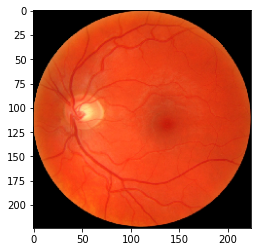

In [28]:
plt.imshow(X[2])

In [29]:
train_set['Id'][2]

1

In [31]:
test_set =  pd.read_csv('/content/drive/MyDrive/Mtech Project/Dataset/Messidor/test.csv')    # reading the csv file
test_set.head() 

,Image,Id,Risk of macular edema
0,20060410_44464_0200_PP.tif,0,0
1,20051213_61892_0100_PP.tif,0,0
2,20051020_53062_0100_PP.tif,3,2
3,20051116_58835_0400_PP.tif,3,1
4,20051214_51811_0100_PP.tif,3,1


In [32]:
test_set.columns

Index(['Image', 'Id', 'Risk of macular edema '], dtype='object')

In [33]:
test_image = []

for i in tqdm(range(test_set.shape[0])):
    img = image.load_img('../content/drive/MyDrive/Mtech Project/Dataset/Messidor/test/' + test_set['Image'][i],target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)

Y = np.array(test_image)

100%|██████████| 240/240 [00:58<00:00,  4.12it/s]


In [34]:
Y.shape

(240, 224, 224, 3)

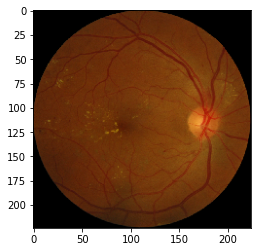

In [35]:
plt.imshow(Y[2])

In [36]:
y = np.array(train_set.drop(['Image', 'Id'],axis=1))
y.shape

(960, 1)

In [37]:
print(X.shape)
print(Y.shape)
print(y.shape)

(960, 224, 224, 3)
(240, 224, 224, 3)
(960, 1)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(864, 224, 224, 3)
(96, 224, 224, 3)
(864, 1)
(96, 1)


In [39]:
vgg19_model = tf.keras.applications.VGG19(
              include_top=True,
              weights="imagenet",
              input_tensor=None,
              input_shape=(224,224,3),
              pooling=None,
              classes=1000,
              classifier_activation="softmax",
          )

574726144/574710816 [==============================] - 6s 0us/step


In [40]:
type(vgg19_model)
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [41]:
model = Sequential()
#model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))
for layer in vgg19_model.layers[:-1]:
    model.add(layer)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [42]:
for layer in model.layers:
    layer.trainable = False

#model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Flatten())
#model.add(Dense(units=4096,activation="relu"))
#model.add(Dense(units=4096,activation="relu"))
model.add(Dense(4,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [43]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
print("Hyperparameters : {} \n".format(model.optimizer.get_config()))

Hyperparameters : {'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False} 



In [44]:
history = model.fit(X_train, y_train,
          batch_size=4,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
216/216 [==============================] - 676s 3s/step - loss: 0.7959 - accuracy: 0.7859 - val_loss: 0.6815 - val_accuracy: 0.8229
Epoch 2/10
216/216 [==============================] - 666s 3s/step - loss: 0.7751 - accuracy: 0.8090 - val_loss: 0.6512 - val_accuracy: 0.8438
Epoch 3/10
216/216 [==============================] - 655s 3s/step - loss: 0.7631 - accuracy: 0.7917 - val_loss: 0.6373 - val_accuracy: 0.8229
Epoch 4/10
216/216 [==============================] - 651s 3s/step - loss: 0.7511 - accuracy: 0.7975 - val_loss: 0.6584 - val_accuracy: 0.8229
Epoch 5/10
216/216 [==============================] - 648s 3s/step - loss: 0.7427 - accuracy: 0.7824 - val_loss: 0.8377 - val_accuracy: 0.8229
Epoch 6/10
216/216 [==============================] - 646s 3s/step - loss: 0.7150 - accuracy: 0.7870 - val_loss: 0.4866 - val_accuracy: 0.8438
Epoch 7/10
216/216 [==============================] - 667s 3s/step - loss: 0.6473 - accuracy: 0.8171 - val_loss: 0.5121 - val_accuracy: 0.8646

In [45]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Hyperparameters : {} \n".format(model.optimizer.get_config()))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Hyperparameters : {'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False} 

Test loss: 0.7719339728355408
Test accuracy: 0.8229166865348816


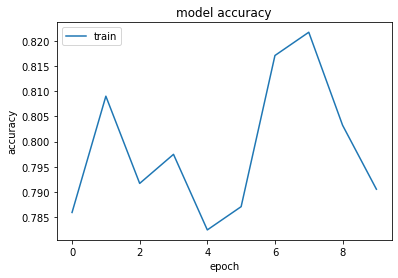

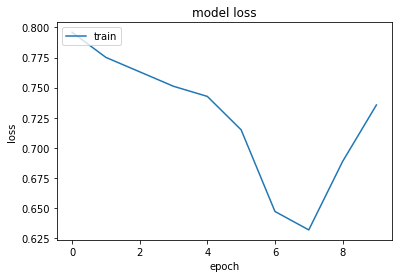

In [46]:
#Plotting the graph of accuracy VS epoch
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

#Plotting the graph of loss VS epoch
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

Text(69.0, 0.5, 'Truth')

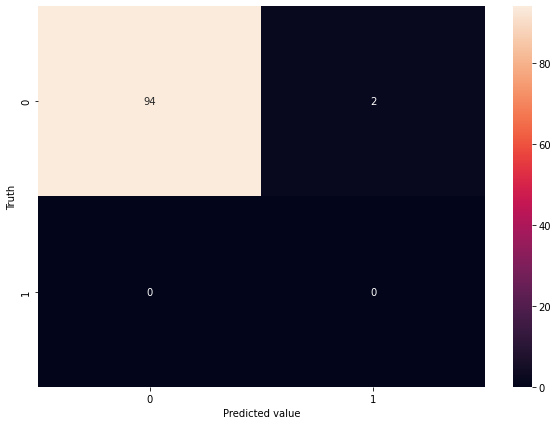

In [47]:
import sklearn.metrics as metrics
import seaborn as sn

y_predict=model.predict(X_test)
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_predict.argmax(axis=1))
#y_true=y_test
#res = tf.math.confusion_matrix(y_true,y_predict)
'''
plot_confusion_matrix(classifier, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize=normalize)'''

plt.figure(figsize = (10,7))
sn.heatmap(matrix,annot=True,fmt='d')
plt.xlabel('Predicted value')
plt.ylabel('Truth')

In [ ]:
matrix

array([[94,  2],
       [ 0,  0]])

In [48]:
#Calculating evaluation metrics of the model
cf_m = matrix
#print(cf_m)

true_positive = []
true_negative = []
false_positive = []
false_negative = []


for i in range(2):
    for j in  range(2):
        if i==j:
            true_positive.append(cf_m[i][j])

print("True positive of values from 0 to 9 : {}".format(true_positive))

total_val = 0
for i in range(2):
    for j in  range(2):
        total_val += cf_m[i][j]
            
for i in range(2):
    for j in  range(2):
        sum_val = 0
        if i!=j:
            sum_val += int(cf_m[i][j])
        false_negative.append(sum_val)
        
for i in range(2):
    for j in  range(2):
        sum_val = 0
        if i!=j:
            sum_val += cf_m[j][i]
        false_positive.append(sum_val)


false_negative_list = []
i = 0
while(i<len(false_negative)):
    count = 0
    val = 0
    while(count<2):
        val = val + false_negative[i]
        i = i+1
        count = count+1
    false_negative_list.append(val)
    
print("False negative of values from 0 to 9 : {}".format(false_negative_list))

false_positive_list = []
i = 0
while(i<len(false_positive)):
    count = 0
    val = 0
    while(count<2):
        val = val + false_positive[i]
        i = i+1
        count = count+1
    false_positive_list.append(val)

print("False positive of values from 0 to 9 : {}".format(false_positive_list))

for i in range(2):
    val = total_val - false_positive_list[i] - false_negative_list[i] - true_positive[i]
    true_negative.append(val)



print("True negative of values from 0 to 9 : {}".format(true_negative))


True positive of values from 0 to 9 : [94, 0]
False negative of values from 0 to 9 : [2, 0]
False positive of values from 0 to 9 : [0, 2]
True negative of values from 0 to 9 : [0, 94]


In [49]:
sensitivity = []
specificity = []
precision = []
F1_score = []

for i in range(2):
    sensitivity_val = round(true_positive[i] / (true_positive[i] + false_negative_list[i]),2)
    sensitivity.append(sensitivity_val)
    
    specificity_val = round((true_negative[i] / (false_positive_list[i] +  true_negative[i])),2)
    specificity.append(specificity_val)
    
    precision_val = round((true_positive[i]/ (true_positive[i] + false_positive_list[i])),2)
    precision.append(precision_val)
    
    #F1_val = round(2*((sensitivity_val*precision_val)/(sensitivity_val+precision_val)))
    #F1_score.append(F1_val)
    
evaluation_metrices = []
num_list = [0,1]

evaluation_metrices.append(num_list)
evaluation_metrices.append(sensitivity)
evaluation_metrices.append(specificity)
evaluation_metrices.append(precision)
#evaluation_metrices.append(F1_score)
    
print(evaluation_metrices)    

[[0, 1], [0.98, nan], [nan, 0.98], [1.0, 0.0]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


In [50]:
[list(i) for i in zip(*evaluation_metrices)]

[[0, 0.98, nan, 1.0], [1, nan, 0.98, 0.0]]